In [0]:
!pip install quandl
!pip install zipline

     |████████████████████████████████| 2.5MB 2.7MB/s 
     |████████████████████████████████| 92kB 19.3MB/s 
     |████████████████████████████████| 26.3MB 37.2MB/s 
     |████████████████████████████████| 143kB 35.4MB/s 
     |████████████████████████████████| 1.3MB 23.3MB/s 
     |████████████████████████████████| 624kB 41.2MB/s 
     |████████████████████████████████| 471kB 35.4MB/s 
     |████████████████████████████████| 1.1MB 38.3MB/s 
     |████████████████████████████████| 51kB 19.6MB/s 
     |████████████████████████████████| 102kB 32.5MB/s 
  Created wheel for zipline: filename=zipline-1.3.0-cp36-cp36m-linux_x86_64.whl size=5008392 sha256=1e30de998d741c5aea30e4a548f6eb5100e4583fdd80a6499140b6d728504f5e
  Stored in directory: /root/.cache/pip/wheels/a4/d6/67/f303ab028b004bf8e00c05b5b04fba83d8ec238b6547becdb7
  Created wheel for Logbook: filename=Logbook-1.5.3-cp36-cp36m-linux_x86_64.whl size=66384 sha256=de7c526d523cffefc10a9467f8230b392a1bcfcab1aa36c3ca351ac7b935d99c
  Store

In [0]:
import quandl
quandl.ApiConfig.api_key = "2eJt4DaeQE1-VPy94vzB" # keep this private

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

# Get Social Sentiment Data

In [0]:
data = quandl.get_table('SMA/FBD', brand_ticker='NVDA')
data = data.set_index("date")
data.tail()

,brand_ticker,page_id,sector,geography,fans,new_fans,fan_post_count,admin_post_count,admin_post_likes,admin_post_comments,admin_post_shares,admin_post_reach,admin_post_impressions,engagement_score,people_talking_about,promoted-admin_post_count,promoted-admin_post_likes,promoted-admin_post_comments,promoted-admin_post_shares,promoted-admin_post_reach,promoted-admin_post_impressions,promoted-engagement_score,organic-admin_post_count,organic-admin_post_likes,organic-admin_post_comments,organic-admin_post_shares,organic-admin_post_reach,organic-admin_post_impressions,organic-engagement_score
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-06,NVDA,527903737269174,Technology,India,6562319,317,0,1,264,13,9,34430,57130,15,5839,1,264,13,9,34430,57130,15,1,264,13,9,34430,57130,15
2019-10-07,NVDA,130554466964019,Technology,Worldwide,6563033,723,0,2,257,819,17,86824,144068,76,4859,2,257,819,17,86824,144068,76,2,257,819,17,86824,144068,76
2019-10-07,NVDA,8409118252,Technology,United States,2273898,187,0,1,78,6,6,26354,43728,14,2385,1,78,6,6,26354,43728,14,1,78,6,6,26354,43728,14
2019-10-07,NVDA,130196237030986,Technology,Brazil,6562500,171,0,2,164,92,18,80785,134045,14,2322,2,164,92,18,80785,134045,14,2,164,92,18,80785,134045,14
2019-10-07,NVDA,527903737269174,Technology,India,6562673,354,0,0,0,0,0,0,0,0,5890,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
oos_start_date = "2018-10-08"
train_data = data[data.index < oos_start_date]
test_data = data[data.index >= oos_start_date]

In [0]:
train_data.tail()

,brand_ticker,page_id,sector,geography,fans,new_fans,fan_post_count,admin_post_count,admin_post_likes,admin_post_comments,admin_post_shares,admin_post_reach,admin_post_impressions,engagement_score,people_talking_about,promoted-admin_post_count,promoted-admin_post_likes,promoted-admin_post_comments,promoted-admin_post_shares,promoted-admin_post_reach,promoted-admin_post_impressions,promoted-engagement_score,organic-admin_post_count,organic-admin_post_likes,organic-admin_post_comments,organic-admin_post_shares,organic-admin_post_reach,organic-admin_post_impressions,organic-engagement_score
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-10-06,NVDA,527903737269174,Technology,India,6355313,170,0,1,115,5,5,12548,20820,7,14891,1,115,5,5,12548,20820,7,1,115,5,5,12548,20820,7
2018-10-07,NVDA,130554466964019,Technology,Worldwide,6355954,637,0,0,0,0,0,0,0,0,2528,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-10-07,NVDA,8409118252,Technology,United States,2240204,-145,0,0,0,0,0,0,0,0,5512,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-10-07,NVDA,130196237030986,Technology,Brazil,6355928,635,0,1,47,87,1,15608,25898,18,2014,1,47,87,1,15608,25898,18,1,47,87,1,15608,25898,18
2018-10-07,NVDA,527903737269174,Technology,India,6355942,629,1,0,0,0,0,0,0,0,13023,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
test_data.head()

,brand_ticker,page_id,sector,geography,fans,new_fans,fan_post_count,admin_post_count,admin_post_likes,admin_post_comments,admin_post_shares,admin_post_reach,admin_post_impressions,engagement_score,people_talking_about,promoted-admin_post_count,promoted-admin_post_likes,promoted-admin_post_comments,promoted-admin_post_shares,promoted-admin_post_reach,promoted-admin_post_impressions,promoted-engagement_score,organic-admin_post_count,organic-admin_post_likes,organic-admin_post_comments,organic-admin_post_shares,organic-admin_post_reach,organic-admin_post_impressions,organic-engagement_score
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-10-08,NVDA,130554466964019,Technology,Worldwide,6356519,565,0,1,150,179,10,50566,83905,40,2670,1,150,179,10,50566,83905,40,1,150,179,10,50566,83905,40
2018-10-08,NVDA,8409118252,Technology,United States,2240071,-133,0,1,68,8,12,14704,24399,19,5588,1,68,8,12,14704,24399,19,1,68,8,12,14704,24399,19
2018-10-08,NVDA,130196237030986,Technology,Brazil,6356511,583,2,1,29,8,4,3544,5881,4,1974,1,29,8,4,3544,5881,4,1,29,8,4,3544,5881,4
2018-10-08,NVDA,527903737269174,Technology,India,6356514,572,3,1,83,33,6,18458,30627,11,12613,1,83,33,6,18458,30627,11,1,83,33,6,18458,30627,11
2018-10-09,NVDA,130554466964019,Technology,Worldwide,6357175,656,0,2,82,104,2,19503,32362,11,2347,2,82,104,2,19503,32362,11,2,82,104,2,19503,32362,11


Index(['fans', 'new_fans', 'fan_post_count', 'admin_post_count',
       'admin_post_likes', 'admin_post_comments', 'admin_post_shares',
       'admin_post_reach', 'admin_post_impressions', 'engagement_score',
       'people_talking_about', 'promoted-admin_post_count',
       'promoted-admin_post_likes', 'promoted-admin_post_comments',
       'promoted-admin_post_shares', 'promoted-admin_post_reach',
       'promoted-admin_post_impressions', 'promoted-engagement_score',
       'organic-admin_post_count', 'organic-admin_post_likes',
       'organic-admin_post_comments', 'organic-admin_post_shares',
       'organic-admin_post_reach', 'organic-admin_post_impressions',
       'organic-engagement_score'],
      dtype='object')


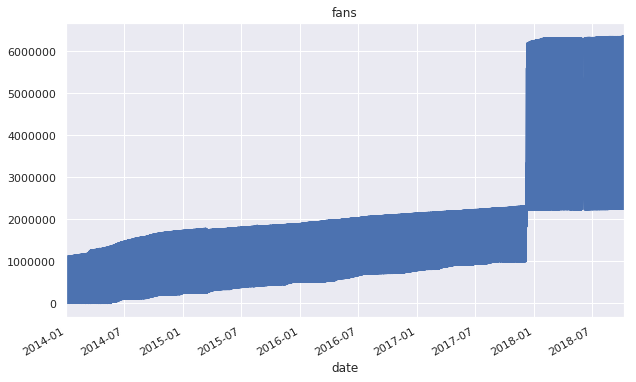

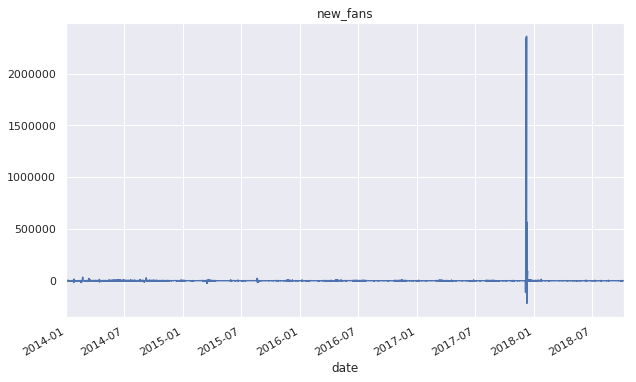

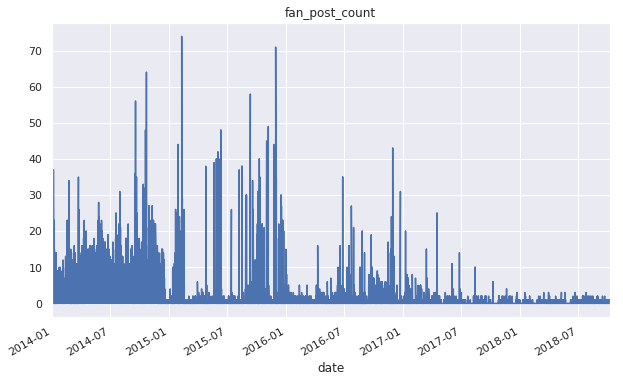

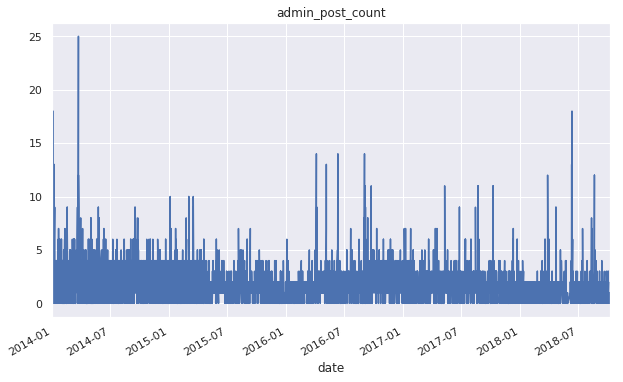

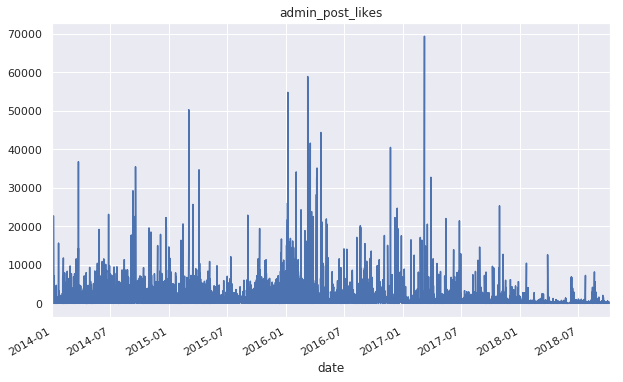

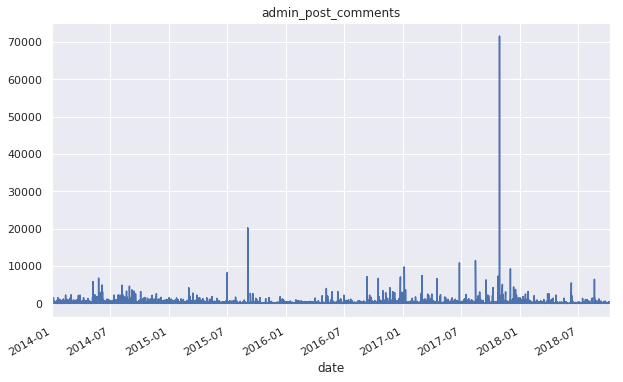

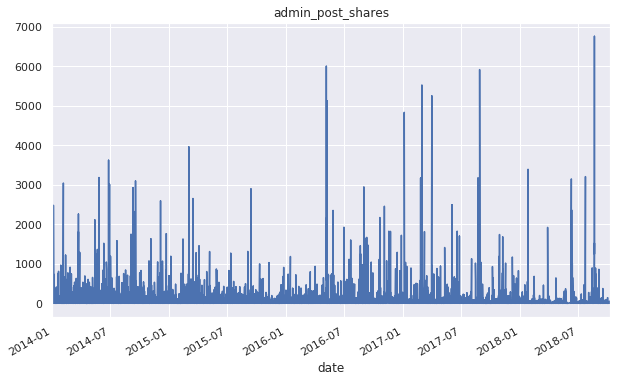

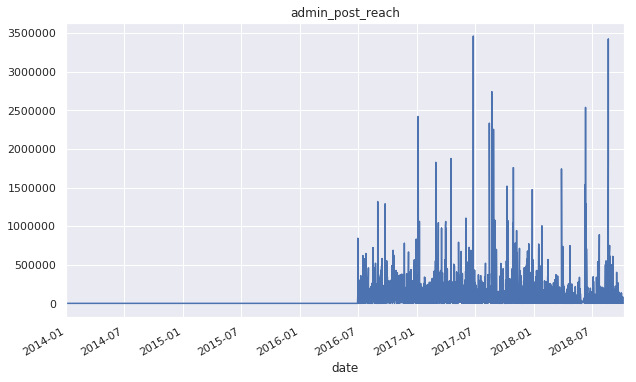

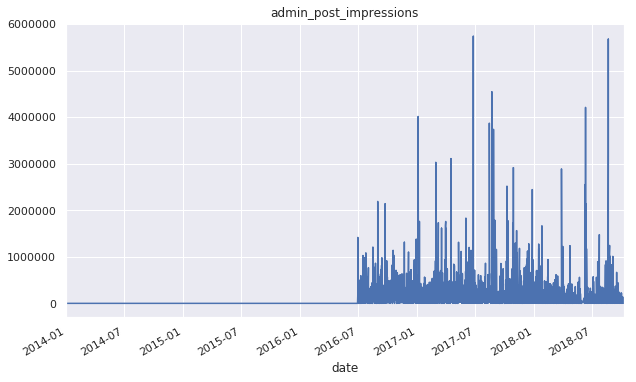

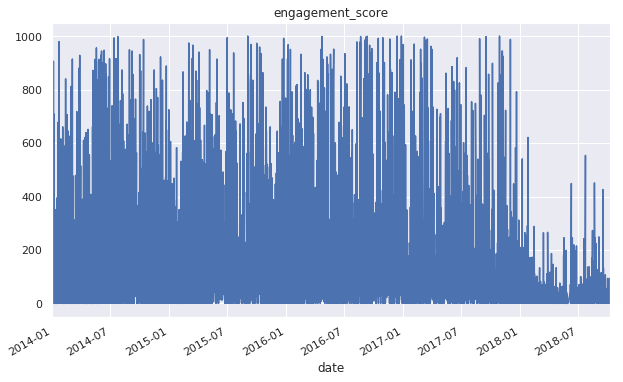

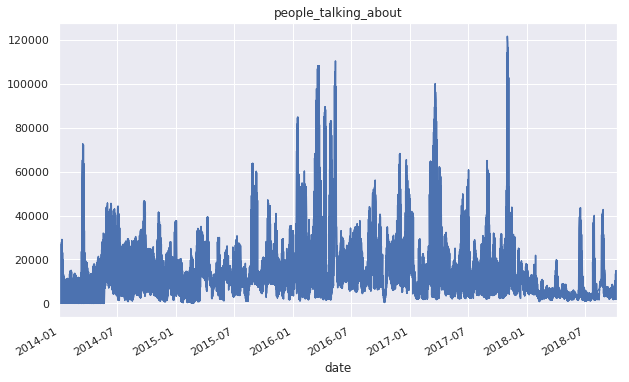

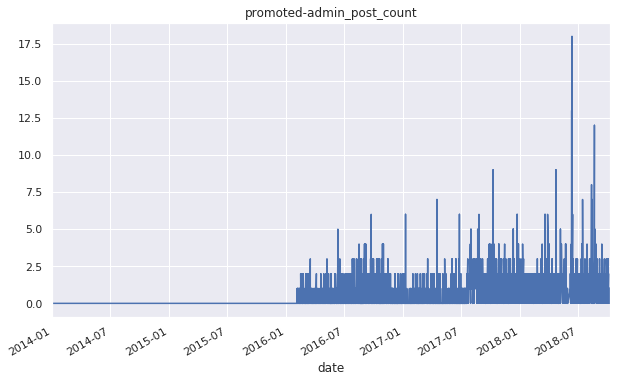

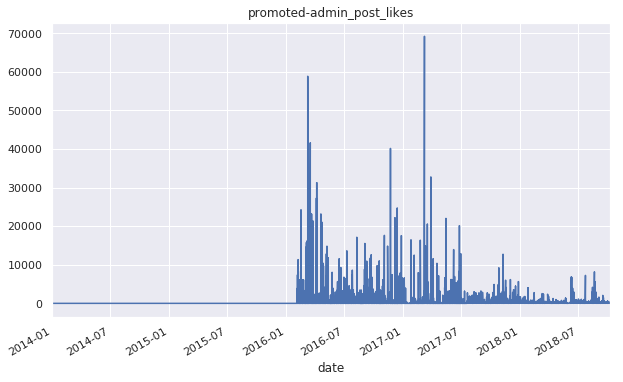

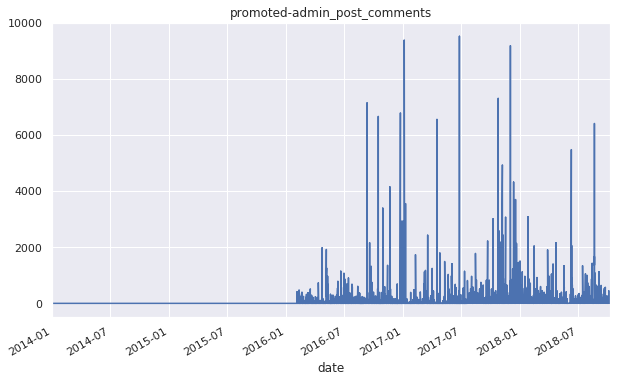

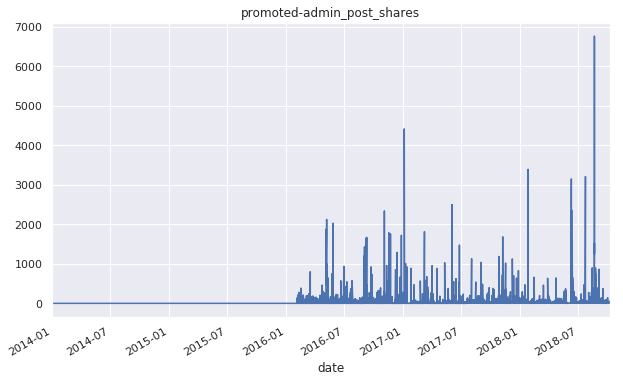

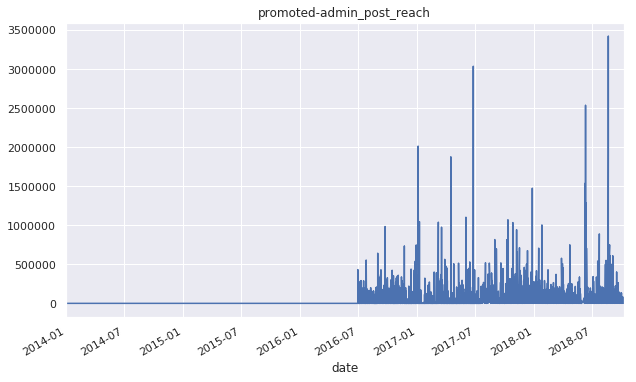

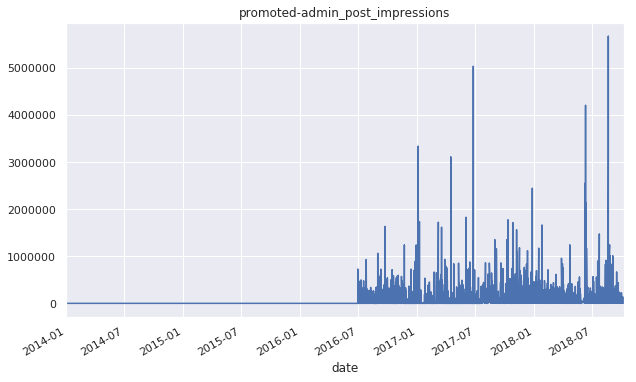

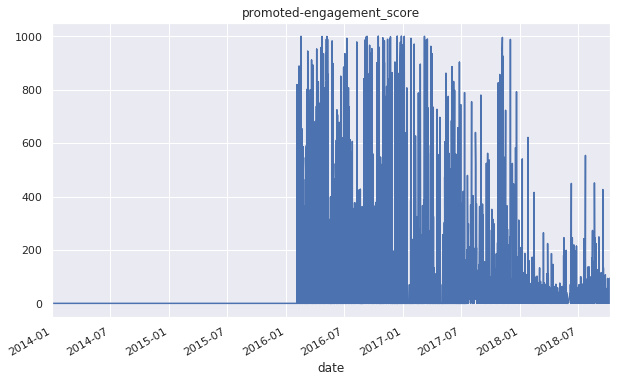

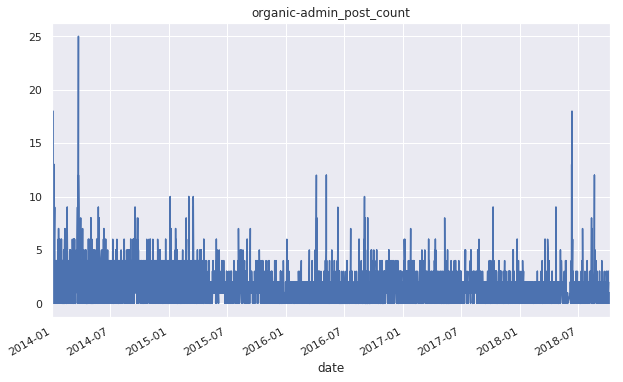

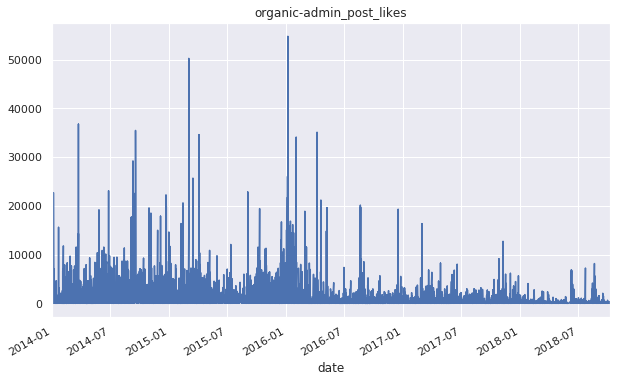

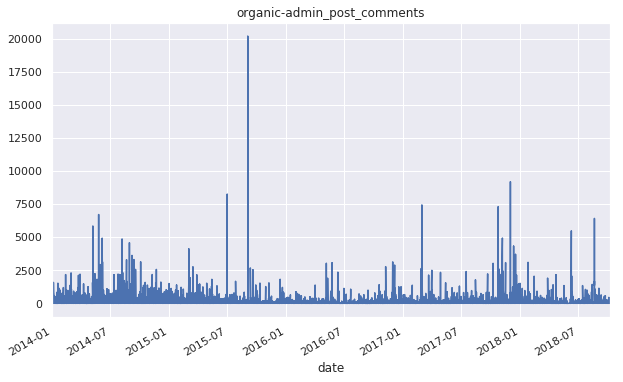

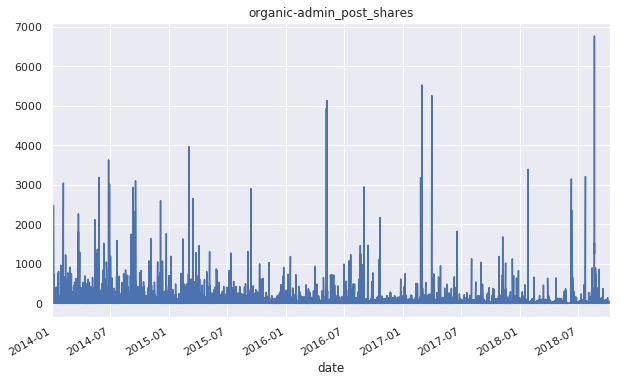

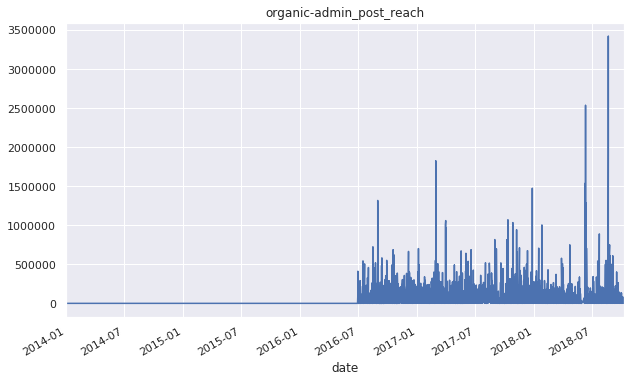

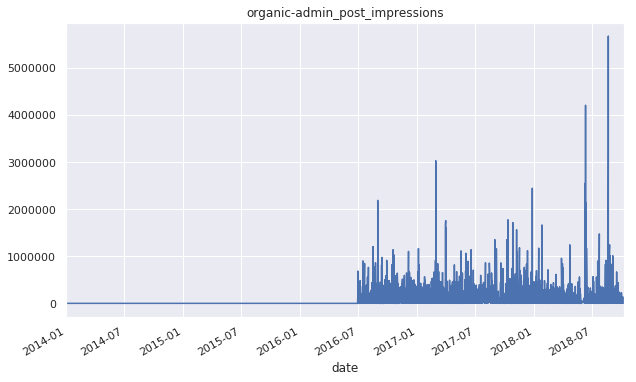

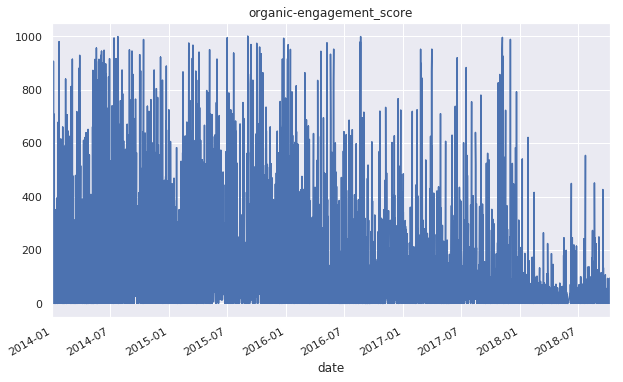

In [0]:
features_considered = data.columns[4:]
print(features_considered)
train_data_filtered_1 = train_data[features_considered]

for feature in features_considered:
    train_data_filtered_1[feature].plot(figsize=[10, 6], title=feature)
    plt.show()

In [0]:
bad_features = ["fans", "new_fans"]
features_used = [feature for feature in list(features_considered) if feature not in bad_features]
features_used

['fan_post_count',
 'admin_post_count',
 'admin_post_likes',
 'admin_post_comments',
 'admin_post_shares',
 'admin_post_reach',
 'admin_post_impressions',
 'engagement_score',
 'people_talking_about',
 'promoted-admin_post_count',
 'promoted-admin_post_likes',
 'promoted-admin_post_comments',
 'promoted-admin_post_shares',
 'promoted-admin_post_reach',
 'promoted-admin_post_impressions',
 'promoted-engagement_score',
 'organic-admin_post_count',
 'organic-admin_post_likes',
 'organic-admin_post_comments',
 'organic-admin_post_shares',
 'organic-admin_post_reach',
 'organic-admin_post_impressions',
 'organic-engagement_score']

In [0]:
train_data_filtered_2 = train_data_filtered_1[features_used]
train_data_filtered_2.head()

,fan_post_count,admin_post_count,admin_post_likes,admin_post_comments,admin_post_shares,admin_post_reach,admin_post_impressions,engagement_score,people_talking_about,promoted-admin_post_count,promoted-admin_post_likes,promoted-admin_post_comments,promoted-admin_post_shares,promoted-admin_post_reach,promoted-admin_post_impressions,promoted-engagement_score,organic-admin_post_count,organic-admin_post_likes,organic-admin_post_comments,organic-admin_post_shares,organic-admin_post_reach,organic-admin_post_impressions,organic-engagement_score
date,,,,,,,,,,,,,,,,,,,,,,,
2014-01-01,0,2,215,570,46,0,0,378,2661,0,0,0,0,0,0,0,2,215,570,46,0,0,378
2014-01-02,0,4,2760,1171,702,0,0,651,2661,0,0,0,0,0,0,0,4,2760,1171,702,0,0,651
2014-01-03,0,2,77,35,6,0,0,41,3632,0,0,0,0,0,0,0,2,77,35,6,0,0,41
2014-01-04,0,2,280,42,54,0,0,129,3895,0,0,0,0,0,0,0,2,280,42,54,0,0,129
2014-01-05,0,18,2006,782,370,0,0,134,3973,0,0,0,0,0,0,0,18,2006,782,370,0,0,134


In [0]:
train_data_filtered_2.isnull().any()

fan_post_count                     False
admin_post_count                   False
admin_post_likes                   False
admin_post_comments                False
admin_post_shares                  False
admin_post_reach                   False
admin_post_impressions             False
engagement_score                   False
people_talking_about               False
promoted-admin_post_count          False
promoted-admin_post_likes          False
promoted-admin_post_comments       False
promoted-admin_post_shares         False
promoted-admin_post_reach          False
promoted-admin_post_impressions    False
promoted-engagement_score          False
organic-admin_post_count           False
organic-admin_post_likes           False
organic-admin_post_comments        False
organic-admin_post_shares          False
organic-admin_post_reach           False
organic-admin_post_impressions     False
organic-engagement_score           False
dtype: bool

In [0]:
train_data_filtered_3 = train_data_filtered_2[train_data_filtered_2.index > "2016-07-01"]
train_data_filtered_3.head()

,fan_post_count,admin_post_count,admin_post_likes,admin_post_comments,admin_post_shares,admin_post_reach,admin_post_impressions,engagement_score,people_talking_about,promoted-admin_post_count,promoted-admin_post_likes,promoted-admin_post_comments,promoted-admin_post_shares,promoted-admin_post_reach,promoted-admin_post_impressions,promoted-engagement_score,organic-admin_post_count,organic-admin_post_likes,organic-admin_post_comments,organic-admin_post_shares,organic-admin_post_reach,organic-admin_post_impressions,organic-engagement_score
date,,,,,,,,,,,,,,,,,,,,,,,
2016-07-02,0,1,2411,35,24,80189,135650,401,27047,1,2411,35,24,80189,135650,401,0,0,0,0,0,0,0
2016-07-03,0,1,6463,865,431,281820,476737,935,27802,1,6463,865,431,281820,476737,935,0,0,0,0,0,0,0
2016-07-04,0,2,3489,585,143,187245,310694,508,28409,2,3489,585,143,187245,310694,508,0,0,0,0,0,0,0
2016-07-05,0,2,2932,452,107,168688,282759,432,29607,0,0,0,0,0,0,0,2,2932,452,107,168688,282759,432
2016-07-06,0,2,2489,403,87,198553,329459,384,31089,2,2489,403,87,198553,329459,384,0,0,0,0,0,0,0


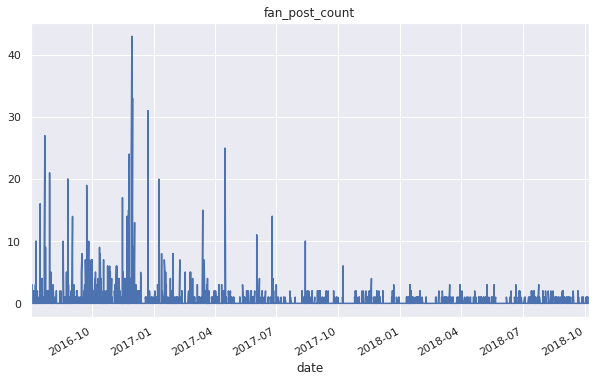

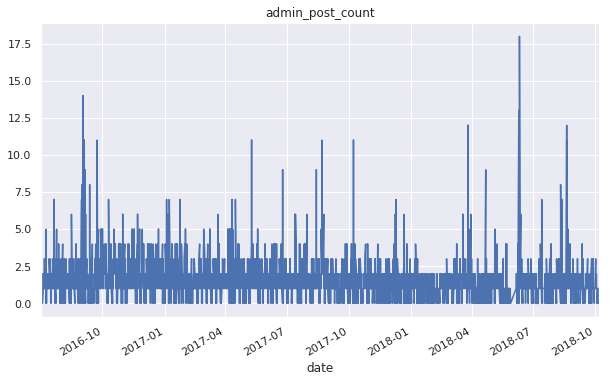

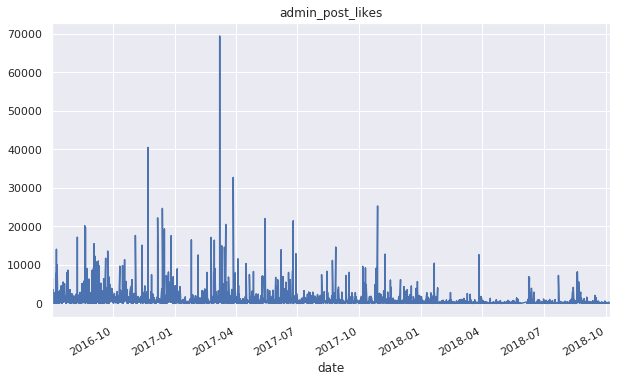

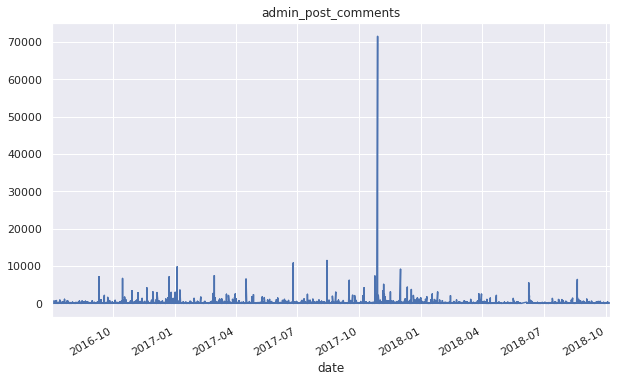

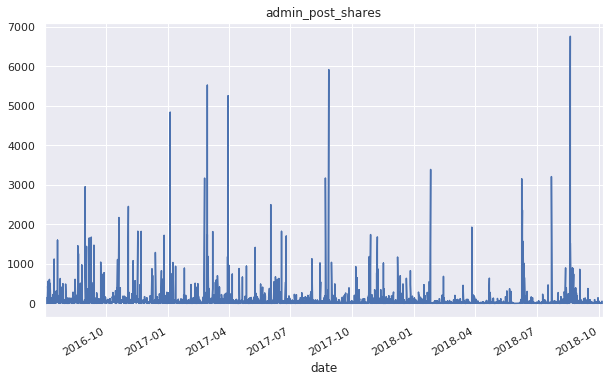

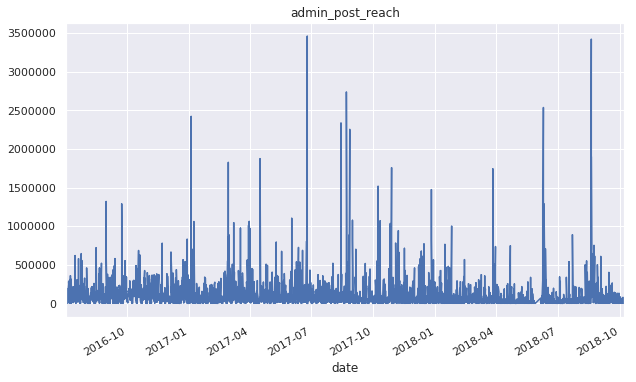

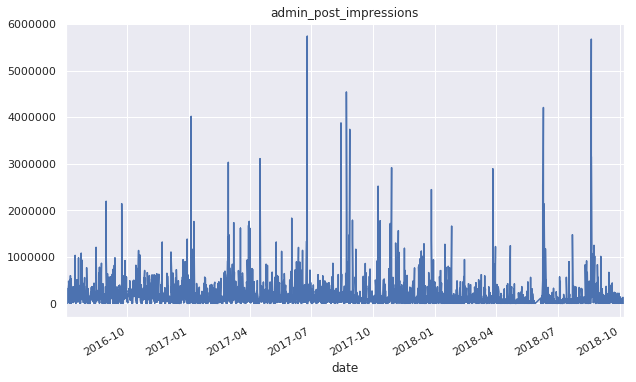

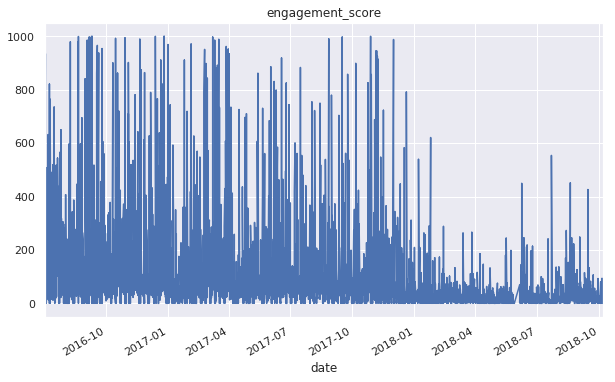

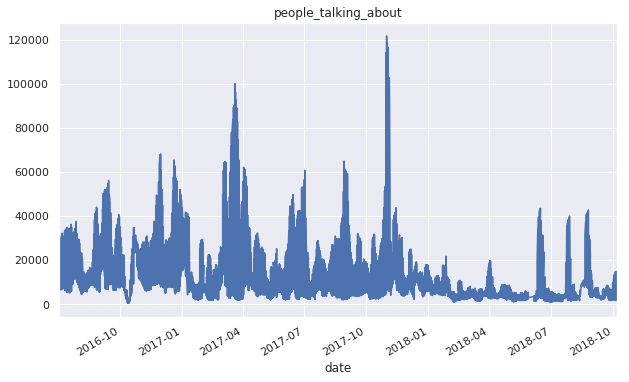

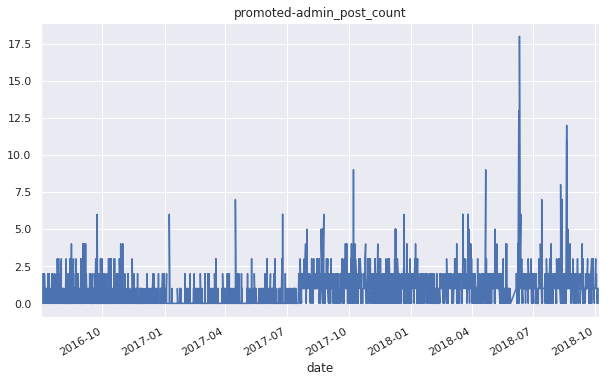

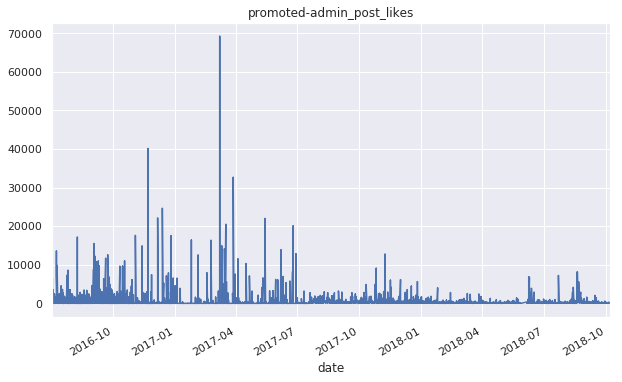

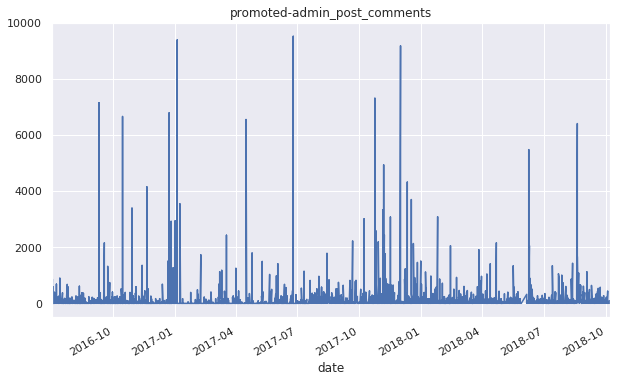

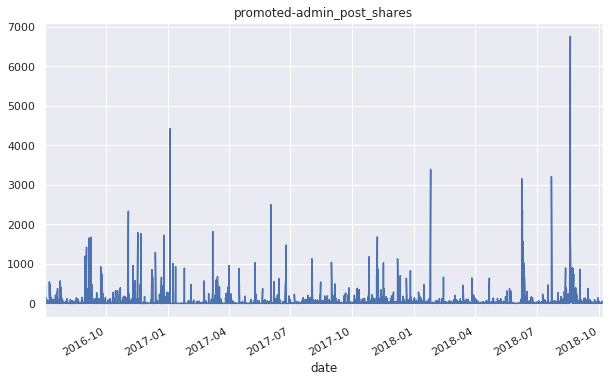

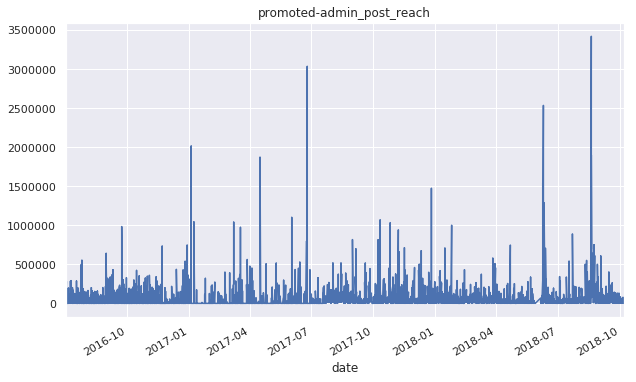

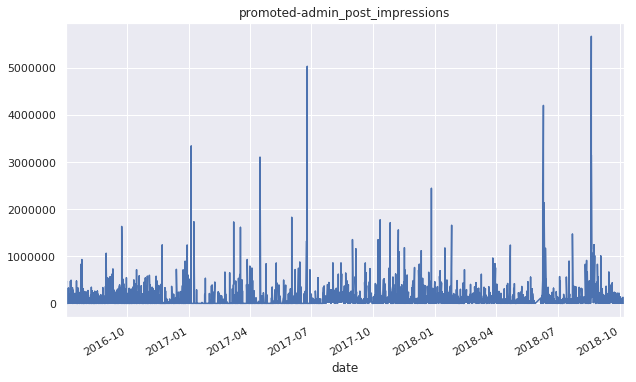

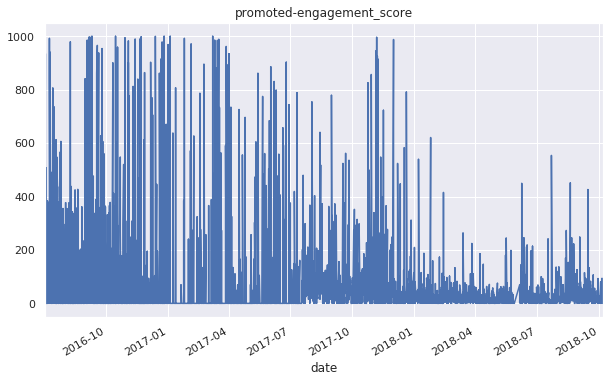

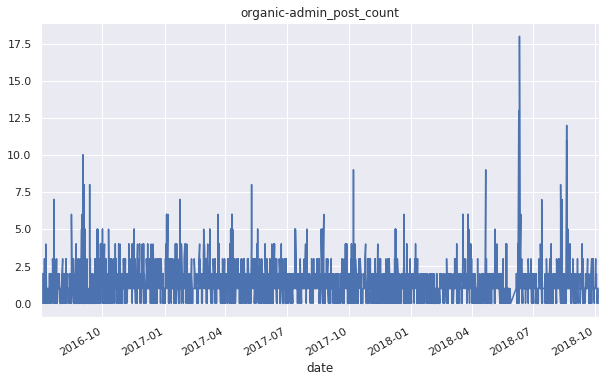

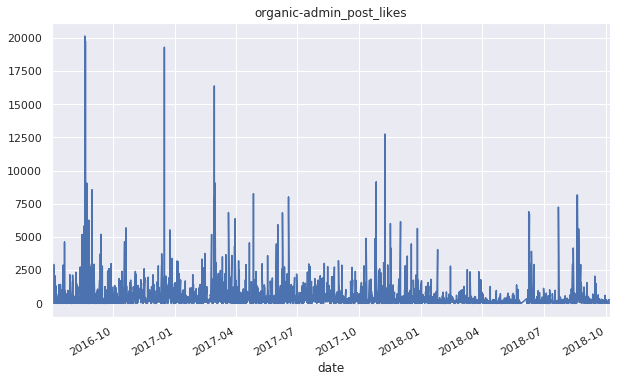

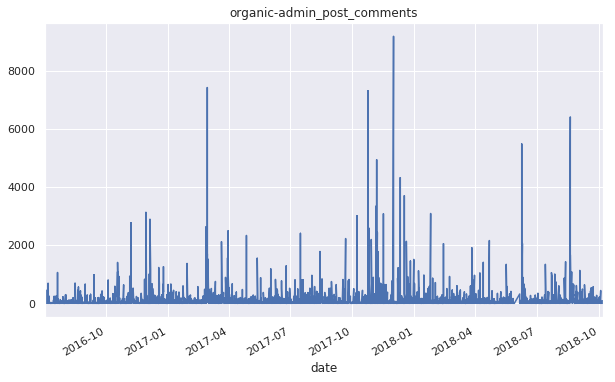

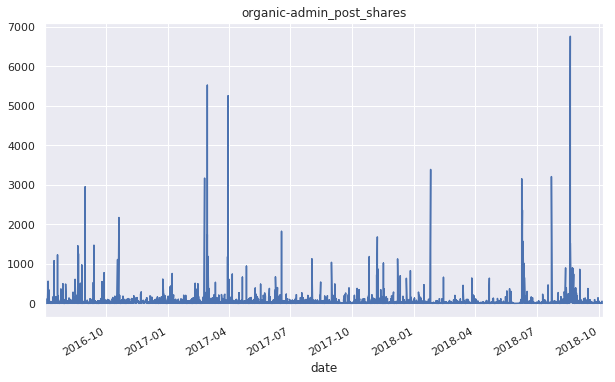

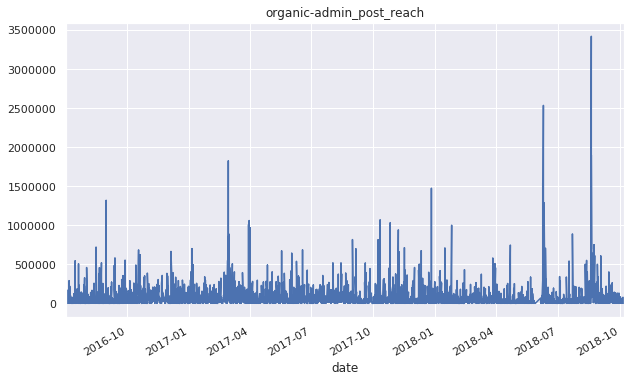

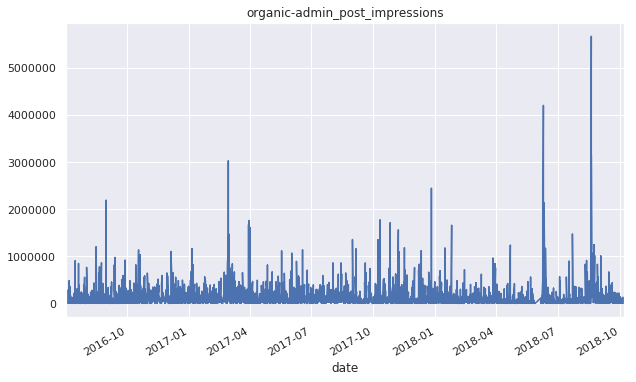

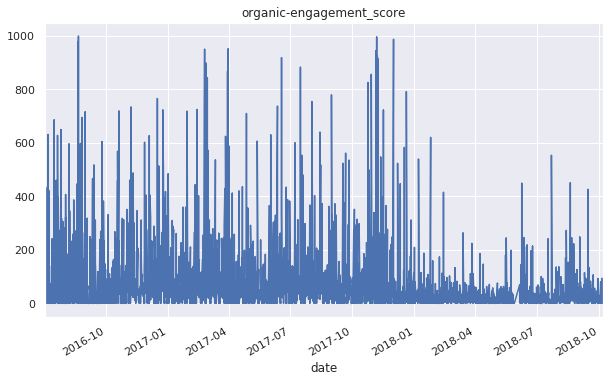

In [0]:
for feature in features_used:
    train_data_filtered_3[feature].plot(figsize=[10, 6], title=feature)
    plt.show()

# Get Price Data

In [0]:
price_data = quandl.get('EOD/NVDA')
price_data.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1999-01-22,21.00,23.44,18.63,19.69,5655600.0,0.0,1.0,1.611382,1.798609,1.429526,1.510862,67867200.0
1999-01-25,21.25,22.00,19.69,21.75,1063500.0,0.0,1.0,1.630565,1.688114,1.510862,1.668931,12762000.0
1999-01-26,22.00,22.44,19.75,20.06,715000.0,0.0,1.0,1.688114,1.721876,1.515466,1.539253,8580000.0
1999-01-27,20.13,20.63,19.00,20.00,509100.0,0.0,1.0,1.544624,1.582991,1.457917,1.534649,6109200.0
1999-01-28,20.00,20.13,19.81,19.94,474000.0,0.0,1.0,1.534649,1.544624,1.520070,1.530045,5688000.0


In [0]:
price_data = price_data["2016-07-01":]
closing_price_data = price_data["Close"]
closing_price_data.head()

Date
2016-07-01    46.66
2016-07-05    47.35
2016-07-06    47.65
2016-07-07    48.89
2016-07-08    50.85
Name: Close, dtype: float64

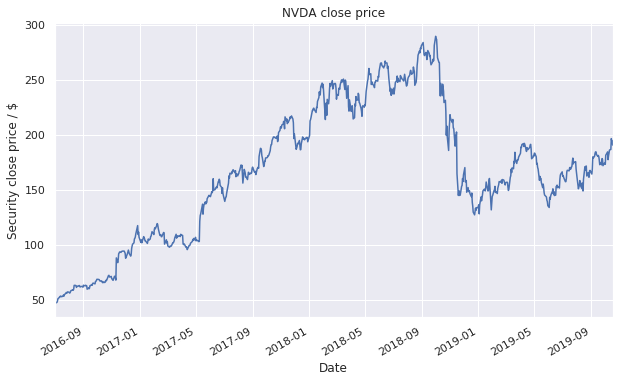

In [0]:
plt.figure(figsize=[10, 6])
plt.title(f'NVDA close price')
plt.ylabel('Security close price / $')
closing_price_data.plot()

In [0]:
closing_price_train = closing_price_data[closing_price_data.index < oos_start_date]
closing_price_test = closing_price_data[closing_price_data.index >= oos_start_date]
closing_price_train.tail()

Date
2018-10-01    289.36
2018-10-02    286.48
2018-10-03    286.73
2018-10-04    279.29
2018-10-05    269.86
Name: Close, dtype: float64

In [0]:
closing_price_test.head()

Date
2018-10-08    265.77
2018-10-09    265.54
2018-10-10    245.69
2018-10-11    235.13
2018-10-12    246.54
Name: Close, dtype: float64

### Generate Signal Using Clustering (An Alternative to Rolling Mean)

In [0]:
def get_cluster_attributes(rolling_data):
    X = np.array(rolling_data)
    X = StandardScaler().fit_transform(X)
    clustering = MeanShift().fit(X)
    return_dict = {"no_clusters": len(clustering.cluster_centers_),
                   "cluster_centers": [list(clustering.cluster_centers_)],
                   "date": rolling_data.index[-1]}
                   #"silhouette_score": silhouette_score(X, clustering.labels_),
    return_df = pd.DataFrame(return_dict, index=[rolling_data.index[-1]])

    return return_df

In [0]:
window_size = 60
window_shift = 3
cluster_data = pd.DataFrame(columns=["no_clusters", "cluster_centers", "date"])
for window_start in range(0, len(train_data_filtered_3) - window_size, window_shift):
    window_end = window_start + window_size
    rolling_data = train_data_filtered_3[window_start:window_end]
    cluster_attributes = get_cluster_attributes(rolling_data)
    cluster_data = cluster_data.append(cluster_attributes)

In [0]:
cluster_data.head()

,no_clusters,cluster_centers,date
2016-08-30,7,"[[0.0, 0.04824237363736635, -0.258194541428301...",2016-08-30
2016-09-02,8,"[[0.0, -0.1114579075995214, -0.223405560206679...",2016-09-02
2016-09-05,7,"[[0.0, -0.18853387943996294, -0.26020190927062...",2016-09-05
2016-09-08,6,"[[0.0, -0.24677380760250356, -0.19617890005876...",2016-09-08
2016-09-11,6,"[[0.0, -0.25665947679908396, -0.18231586579982...",2016-09-11


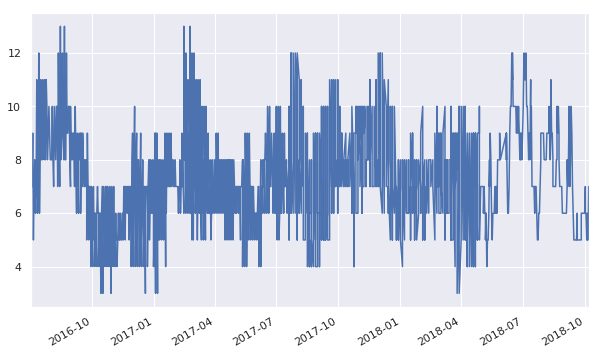

In [0]:
cluster_data["no_clusters"].plot(figsize=[10, 6])

In [0]:
cluster_data["cluster_spread"] = cluster_data["cluster_centers"].apply(lambda x: np.std(x))
cluster_data.head()

,no_clusters,cluster_centers,date,cluster_spread
2016-08-30,7,"[[0.0, 0.04824237363736635, -0.258194541428301...",2016-08-30,1.761882
2016-09-02,8,"[[0.0, -0.1114579075995214, -0.223405560206679...",2016-09-02,1.714840
2016-09-05,7,"[[0.0, -0.18853387943996294, -0.26020190927062...",2016-09-05,1.637468
2016-09-08,6,"[[0.0, -0.24677380760250356, -0.19617890005876...",2016-09-08,1.519153
2016-09-11,6,"[[0.0, -0.25665947679908396, -0.18231586579982...",2016-09-11,1.540683


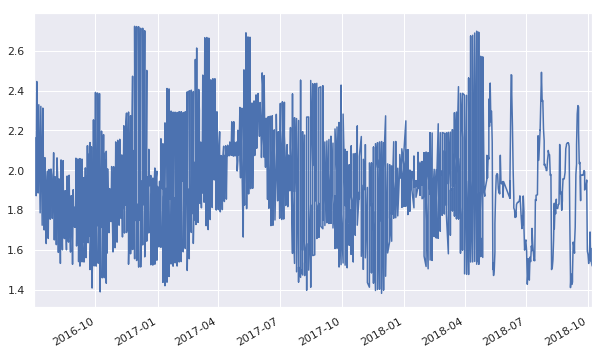

In [0]:
cluster_data["cluster_spread"].plot(figsize=[10, 6])

In [0]:
X_temp = cluster_data["no_clusters"].values.reshape(-1, 1)
X_temp_norm = MinMaxScaler().fit_transform(X_temp)
cluster_data["no_clusters_norm"] = X_temp_norm

X_temp = cluster_data["cluster_spread"].values.reshape(-1, 1)
X_temp_norm = MinMaxScaler().fit_transform(X_temp)
cluster_data["cluster_spread_norm"] = X_temp_norm

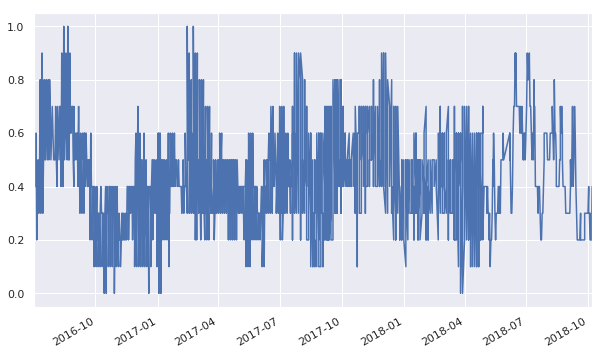

In [0]:
cluster_data["no_clusters_norm"].plot(figsize=[10, 6])

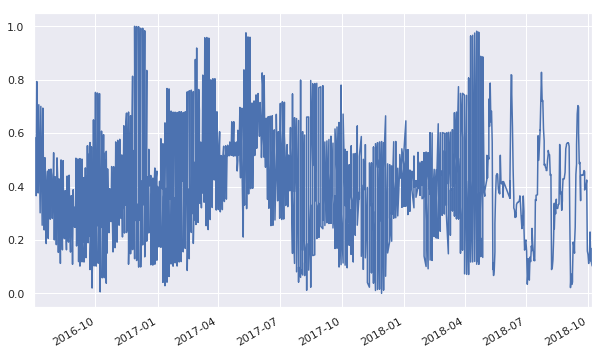

In [0]:
cluster_data["cluster_spread_norm"].plot(figsize=[10, 6])

### Trading Algorithm and Backtesting

In [0]:
cluster_data.head()
cluster_data.count()

no_clusters            1075
cluster_centers        1075
date                   1075
cluster_spread         1075
no_clusters_norm       1075
cluster_spread_norm    1075
dtype: int64

In [0]:
price_data.count()

Open          831
High          831
Low           831
Close         831
Volume        831
Dividend      831
Split         831
Adj_Open      831
Adj_High      831
Adj_Low       831
Adj_Close     831
Adj_Volume    831
dtype: int64

In [0]:
price_signal = price_data.join(cluster_data, on='')

In [0]:
import zipline
from zipline.algorithm import TradingAlgorithm
from zipline.finance import commission, slippage
from zipline.api import (order_target_percent, symbol, schedule_function, date_rules,
                         get_datetime, set_commission, set_slippage)


def initialize(context):
    context.short_threshold = 0.85
    context.long_threshold = 0.15
    context.gross_leverage = 1.0

    # Zero transaction cost
    set_commission(commission.PerShare(cost=0, min_trade_cost=0))
    set_slippage(slippage.FixedSlippage(spread=0.0))

    schedule_function(trade, date_rules.week_start())
    context.prev_holdings = set()

def trade(context, data):
    current_date = get_datetime().tz_localize(None).normalize()
    todays_sp500_rainfall = sp500_daily_rainfall_3mo.loc[current_date].copy()
    
    todays_sp500_rainfall = todays_sp500_rainfall.sort_values(ascending=True)
    
    longs = []
    shorts = []
    for stock, rainfall in todays_sp500_rainfall.items():
        if stock not in pricing.loc[current_date].dropna():
            continue
        if rainfall <= context.long_threshold:
            longs.append(stock)
        elif rainfall >= context.short_threshold:
            shorts.append(stock)

    for stock in longs:
        order_target_percent(symbol(stock), context.gross_leverage * 0.5  / len(longs))
    for stock in shorts:
        order_target_percent(symbol(stock), -context.gross_leverage * 0.5  / len(shorts))

    # Close previous positions
    for stock in context.prev_holdings:
        if stock not in longs and stock not in shorts:
            order_target_percent(symbol(stock), 0)

    context.prev_holdings = set(longs + shorts)

ValueError: ignored